<a href="https://colab.research.google.com/github/Eric-BR2001/DataScience/blob/master/Quarentena_Aula_3(Alura).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 3

##Código da Aula

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [0]:
imdb["color"].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [0]:
imdb["color"].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [0]:
imdb["director_name"].value_counts().tail(20)

David Jacobson        1
Tim Chambers          1
Andrew Douglas        1
Michael Dinner        1
Etan Cohen            1
John Guillermin       1
Laurent Bouhnik       1
Eric Styles           1
Adam Jay Epstein      1
Jon Wright            1
Lauren Lazin          1
Sacha Bennett         1
Kinka Usher           1
Benjamin Dickinson    1
Michael Burke         1
Agustín Díaz Yanes    1
Louis Morneau         1
Rick Rosenthal        1
Dagur Kári            1
Tim Miller            1
Name: director_name, dtype: int64

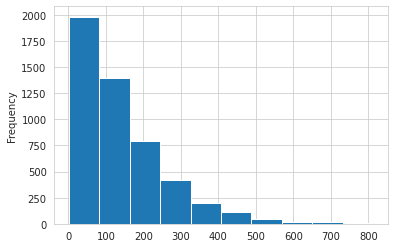

In [0]:
imdb["num_critic_for_reviews"].plot(kind="hist")

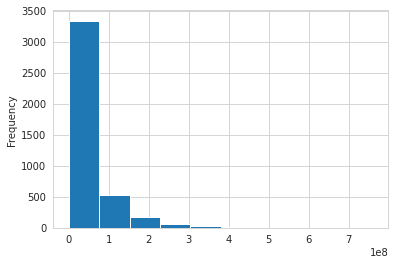

In [0]:
imdb["gross"].plot(kind="hist")

In [0]:
imdb.sort_values("gross", ascending=False).sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4617,Color,Charlie Levi,NaN,90.0,0.0,171.0,Barbara Hershey,1000.0,NaN,Drama,Joe Mantegna,Childless,33,1996,Diane Venora,5.0,NaN,http://www.imdb.com/title/tt0867270/?ref_=fn_t...,NaN,English,USA,R,1000000.0,2008.0,618.0,6.1,NaN,3
1166,Color,John Glen,117.0,133.0,46.0,275.0,Talisa Soto,683.0,34667015.0,Action|Adventure|Thriller,Robert Davi,Licence to Kill,74009,2371,Anthony Zerbe,0.0,drug cartel|drug lord|james bond 007|personal ...,http://www.imdb.com/title/tt0097742/?ref_=fn_t...,317.0,English,UK,PG-13,32000000.0,1989.0,349.0,6.6,2.35,0
35,Color,Dan Scanlon,376.0,104.0,37.0,760.0,Tyler Labine,12000.0,268488329.0,Adventure|Animation|Comedy|Family|Fantasy,Steve Buscemi,Monsters University,235025,14863,Sean Hayes,0.0,cheating|fraternity|monster|singing in a car|u...,http://www.imdb.com/title/tt1453405/?ref_=fn_t...,265.0,English,USA,G,200000000.0,2013.0,779.0,7.3,1.85,44000
766,Color,Griffin Dunne,92.0,104.0,165.0,944.0,Dianne Wiest,1000.0,46611204.0,Comedy|Drama|Fantasy|Romance,Goran Visnjic,Practical Magic,55749,4294,Stockard Channing,1.0,curse|death|island|love|magic,http://www.imdb.com/title/tt0120791/?ref_=fn_t...,257.0,English,USA,PG-13,48000000.0,1998.0,967.0,6.1,2.35,0
2062,Color,Wayne Wang,36.0,114.0,61.0,407.0,Eva Amurri Martino,20000.0,18653615.0,Comedy|Drama,Natalie Portman,Anywhere But Here,14786,22040,Shawn Hatosy,2.0,family relationships|female protagonist|nubile...,http://www.imdb.com/title/tt0149691/?ref_=fn_t...,103.0,English,USA,PG-13,23000000.0,1999.0,797.0,6.1,2.35,638
230,Color,David Twohy,207.0,134.0,123.0,567.0,Alexa Davalos,14000.0,57637485.0,Action|Adventure|Sci-Fi|Thriller,Vin Diesel,The Chronicles of Riddick,183909,17159,Christina Cox,0.0,bounty hunter|escape|necromonger|planet|warrior,http://www.imdb.com/title/tt0296572/?ref_=fn_t...,666.0,English,USA,PG-13,105000000.0,2004.0,850.0,6.7,2.35,0
1809,Color,Todd Graff,98.0,118.0,650.0,715.0,Jeremy Jordan,1000.0,30920167.0,Comedy|Music,Dolly Parton,Joyful Noise,6476,3389,Jesse L. Martin,4.0,bare chested male|chips|two word title,http://www.imdb.com/title/tt1710396/?ref_=fn_t...,71.0,English,USA,PG-13,25000000.0,2012.0,773.0,5.7,2.35,0
4558,Color,Craig Johnson,185.0,93.0,7.0,180.0,Boyd Holbrook,3000.0,5283379.0,Comedy|Drama,Ty Burrell,The Skeleton Twins,31254,3986,Kathleen Rose Perkins,2.0,adultery|brother sister relationship|estrangem...,http://www.imdb.com/title/tt1571249/?ref_=fn_t...,79.0,English,USA,R,NaN,2014.0,439.0,6.8,2.35,0
15,Color,Zack Snyder,733.0,143.0,0.0,748.0,Christopher Meloni,15000.0,291021565.0,Action|Adventure|Fantasy|Sci-Fi,Henry Cavill,Man of Steel,548573,20495,Harry Lennix,0.0,based on comic book|british actor playing amer...,http://www.imdb.com/title/tt0770828/?ref_=fn_t...,2536.0,English,USA,PG-13,225000000.0,2013.0,3000.0,7.2,2.35,118000
515,Color,John Singleton,150.0,107.0,309.0,771.0,Cole Hauser,23000.0,127083765.0,Action|Crime|Thriller,Paul Walker,2 Fast 2 Furious,191912,25296,Mo Gallini,5.0,bust|racing|shotgun|street racing|undercover a...,http://www.imdb.com/title/tt0322259/?ref_=fn_t...,370.0,English,USA,PG-13,76000000.0,2003.0,787.0,5.9,2.35,0


##Perguntas gerais


*   aventura tem nota melhor que comédia
*   Diretor com mais filmes tem nota melhor? tem mais faturamento?

*   as respostas são específicas para a amostra ou para o mundo?

*   quais correlações existem entre os dados


*   budget X gross?
*   title_year com algo?




In [0]:
color_or_bw = imdb.query("color in ['Color' , ' Black and White']")
len(color_or_bw)

5024

In [0]:
color_or_bw["color_0_ou_1"] = (color_or_bw["color"] == "Color")*1
color_or_bw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [0]:
color_or_bw["color_0_ou_1"].value_counts()

1    4815
0     209
Name: color_0_ou_1, dtype: int64

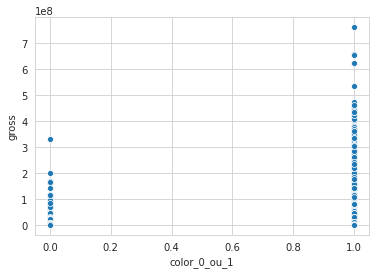

In [0]:
sns.scatterplot(data=color_or_bw, x="color_0_ou_1", y="gross")

In [0]:
color_or_bw.groupby("color").mean()["gross"]

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [0]:
color_or_bw.groupby("color").mean()["imdb_score"]

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

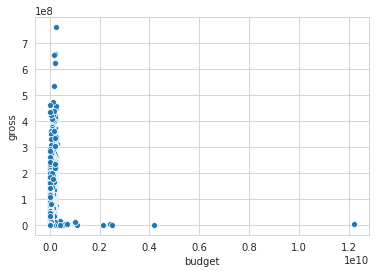

In [0]:
budget_gross=imdb[["budget", "gross"]].dropna().query("budget > 0 | gross > 0")
sns.scatterplot(data=budget_gross, x="budget", y="gross")

In [0]:
imdb.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


In [0]:
imdb.country.unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [0]:
imdb = imdb.drop_duplicates()
imdb_USA = imdb.query("country == 'USA'")
imdb_USA.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


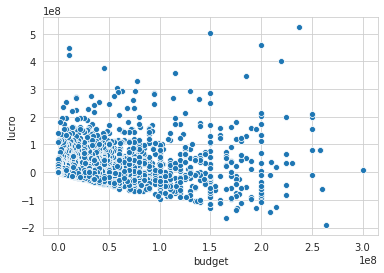

In [0]:
#vendo a distribuição de filmes entre orçamento e lucro
imdb_USA['lucro'] = imdb_USA['gross'] - imdb_USA['budget']

budget_gross = imdb_USA.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()

sns.scatterplot(x="budget", y="lucro", data = budget_gross)


In [0]:
imdb_USA.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,-59192738.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


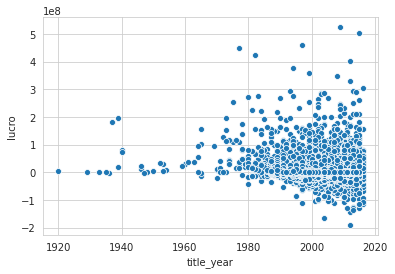

In [0]:
#lucro/prejuizo
#relação com lucro/prejuízo

budget_lucro=imdb_USA.query("budget > 0 | gross > 0")[["title_year", "lucro"]].dropna()
sns.scatterplot(data=budget_lucro, x="title_year", y="lucro")



In [0]:
budget_lucro=imdb_USA.query("budget > 0 | gross > 0")[["budget", "lucro"]].dropna()
sns.scatterplot(data=budget_lucro, x="budget", y="lucro")

In [0]:
filmes_por_diretor = imdb_USA.director_name.value_counts()
filmes_por_diretor.head()

Steven Spielberg    24
Clint Eastwood      20
Martin Scorsese     20
Woody Allen         18
Tim Burton          16
Name: director_name, dtype: int64

In [0]:
gross_director = imdb_USA[["director_name", "budget", "gross", "lucro"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["budget", "gross", "lucro", "number_of_movies"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,budget,gross,lucro,number_of_movies
0,James Cameron,237000000.0,760505847.0,523505847.0,6.0
1,Gore Verbinski,300000000.0,309404152.0,9404152.0,7.0
2,Christopher Nolan,250000000.0,448130642.0,198130642.0,8.0
3,Andrew Stanton,263700000.0,73058679.0,-190641321.0,3.0
4,Sam Raimi,258000000.0,336530303.0,78530303.0,11.0


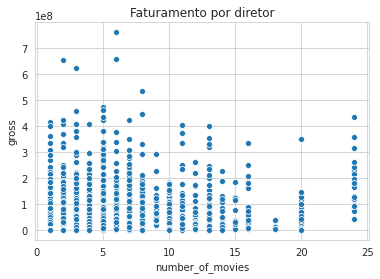

In [0]:
sns.scatterplot(x="number_of_movies", y="gross", data=gross_director,)
plt.title("Faturamento por diretor")
plt.show()

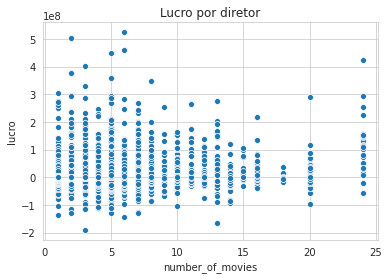

In [0]:
sns.scatterplot(x="number_of_movies", y="lucro", data=gross_director)
plt.title("Lucro por diretor")
plt.show()

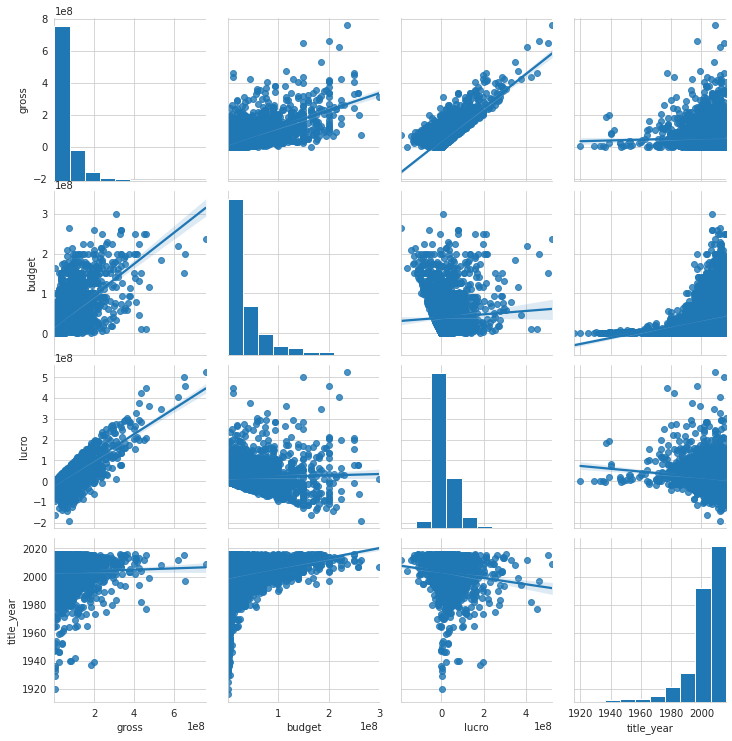

In [0]:
sns.pairplot(data= imdb_USA[["gross", "budget" ,  "lucro" ,  "title_year"]], kind="reg")
plt.show()

In [0]:
imdb_USA[["gross", "budget" ,  "lucro" ,  "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


##Desafio 1: BoxPlot de media do colorido e do preto e branco

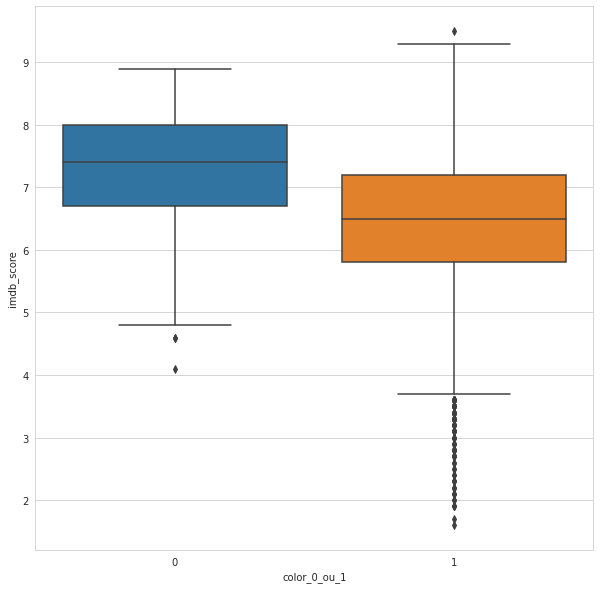

In [0]:
plt.figure(figsize=(10,10))
sns.boxplot(data = color_or_bw,x='color_0_ou_1',y='imdb_score')
plt.show()

##Desafio 2: quem gastou os tubos e teve esse prejuizão próximo do 2.5 


 resposta Andrew Stanton com o filme John Carter

In [0]:
imdb_USA.sort_values(["lucro","budget"]).head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
91,Color,Robert Zemeckis,188.0,100.0,0.0,267.0,Eddie Deezen,15000.0,665426.0,Adventure|Animation|Family|Fantasy,Tom Hanks,The Polar Express,120798,16264,Peter Scolari,0.0,boy|christmas|christmas eve|north pole|train,http://www.imdb.com/title/tt0338348/?ref_=fn_t...,444.0,English,USA,G,165000000.0,2004.0,726.0,6.6,2.35,10000,-164334574.0
28,Color,Peter Berg,377.0,131.0,532.0,627.0,Alexander Skarsgård,14000.0,65173160.0,Action|Adventure|Sci-Fi|Thriller,Liam Neeson,Battleship,202382,26679,Tadanobu Asano,0.0,box office flop|hawaii|naval|oahu hawaii|ship,http://www.imdb.com/title/tt1440129/?ref_=fn_t...,751.0,English,USA,PG-13,209000000.0,2012.0,10000.0,5.9,2.35,44000,-143826840.0
85,Color,Carl Rinsch,218.0,128.0,47.0,982.0,Cary-Hiroyuki Tagawa,18000.0,38297305.0,Action|Adventure|Drama|Fantasy,Keanu Reeves,47 Ronin,116994,20965,Jin Akanishi,2.0,box office flop|ronin|samurai|shogun|tournament,http://www.imdb.com/title/tt1335975/?ref_=fn_t...,324.0,English,USA,PG-13,175000000.0,2013.0,1000.0,6.3,2.35,35000,-136702695.0
49,Color,Bryan Singer,338.0,114.0,0.0,140.0,Ewen Bremner,979.0,65171860.0,Adventure|Fantasy,Eddie Marsan,Jack the Giant Slayer,106416,1766,Ralph Brown,1.0,bean|giant|king|no opening credits|princess,http://www.imdb.com/title/tt1351685/?ref_=fn_t...,205.0,English,USA,PG-13,195000000.0,2013.0,557.0,6.3,2.35,22000,-129828140.0
62,Color,Lana Wachowski,384.0,127.0,0.0,13000.0,Mila Kunis,17000.0,47375327.0,Action|Adventure|Sci-Fi,Channing Tatum,Jupiter Ascending,139593,47334,Eddie Redmayne,1.0,box office flop|critically bashed|planet earth...,http://www.imdb.com/title/tt1617661/?ref_=fn_t...,720.0,English,USA,PG-13,176000000.0,2015.0,15000.0,5.4,2.35,44000,-128624673.0
143,Color,Simon Wells,132.0,88.0,25.0,433.0,Dan Fogler,921.0,21379315.0,Action|Adventure|Animation|Comedy|Family|Sci-Fi,Elisabeth Harnois,Mars Needs Moms,17590,2652,Tom Everett Scott,0.0,boy|martian|rescue|robot|sexism,http://www.imdb.com/title/tt1305591/?ref_=fn_t...,112.0,English,USA,PG,150000000.0,2011.0,562.0,5.4,2.35,0,-128620685.0
14,Color,Gore Verbinski,450.0,150.0,563.0,1000.0,Ruth Wilson,40000.0,89289910.0,Action|Adventure|Western,Johnny Depp,The Lone Ranger,181792,45757,Tom Wilkinson,1.0,horse|outlaw|texas|texas ranger|train,http://www.imdb.com/title/tt1210819/?ref_=fn_t...,711.0,English,USA,PG-13,215000000.0,2013.0,2000.0,6.5,2.35,48000,-125710090.0
145,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,Hugh Jackman,Pan,39956,21393,Nonso Anozie,4.0,1940s|child hero|fantasy world|orphan|referenc...,http://www.imdb.com/title/tt3332064/?ref_=fn_t...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000,-115035182.0
3879,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,Hugh Jackman,Pan,39975,21404,Nonso Anozie,4.0,1940s|child hero|fantasy world|orphan|referenc...,http://www.imdb.com/title/tt3332064/?ref_=fn_t...,186.0,English,USA,PG,150000000.0,2015.0,559.0,5.8,2.35,24000,-115035182.0


In [0]:
gross_director.sort_values("lucro").head(10)

,director_name,budget,gross,lucro,number_of_movies
3,Andrew Stanton,263700000.0,73058679.0,-190641321.0,3.0
80,Robert Zemeckis,165000000.0,665426.0,-164334574.0,13.0
22,Peter Berg,209000000.0,65173160.0,-143826840.0,6.0
74,Carl Rinsch,175000000.0,38297305.0,-136702695.0,1.0
41,Bryan Singer,195000000.0,65171860.0,-129828140.0,7.0
53,Lana Wachowski,176000000.0,47375327.0,-128624673.0,5.0
124,Simon Wells,150000000.0,21379315.0,-128620685.0,2.0
10,Gore Verbinski,215000000.0,89289910.0,-125710090.0,7.0
125,Joe Wright,150000000.0,34964818.0,-115035182.0,3.0
2926,Joe Wright,150000000.0,34964818.0,-115035182.0,3.0


##Desafio 3: filmes mais recentes tiveram maior prejuízo?

In [0]:
imdb_USA[["title_year", "lucro"]].corr()

,title_year,lucro
title_year,1.000000,-0.123035
lucro,-0.123035,1.000000


há uma leve correlação, mas não o suficiente para podermos tomar decisões baseadas nela

##Desafio 4: quais são os filmes pré 2ª guerra que tiveram maior lucro 

In [0]:
filmes_pre_2_guerra_USA=imdb_USA.dropna().query("title_year < 1939")
filmes_pre_2_guerra_USA.sort_values("lucro", ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
4449,Color,William Cottrell,145.0,83.0,0.0,31.0,Billy Gilbert,82.0,184925485.0,Animation|Family|Fantasy|Musical,Adriana Caselotti,Snow White and the Seven Dwarfs,133348,229,Lucille La Verne,1.0,dwarf|love|princess|queen|snow white,http://www.imdb.com/title/tt0029583/?ref_=fn_t...,204.0,English,USA,Approved,2000000.0,1937.0,47.0,7.7,1.37,0,182925485.0
4812,Black and White,Harry Beaumont,36.0,100.0,4.0,4.0,Bessie Love,77.0,2808000.0,Musical|Romance,Anita Page,The Broadway Melody,4546,109,Charles King,8.0,sibling rivalry|singer|sister act|whistling|wi...,http://www.imdb.com/title/tt0019729/?ref_=fn_t...,71.0,English,USA,Passed,379000.0,1929.0,28.0,6.3,1.37,167,2429000.0
4706,Black and White,Mark Sandrich,66.0,81.0,10.0,23.0,Edward Everett Horton,610.0,3000000.0,Comedy|Musical|Romance,Ginger Rogers,Top Hat,13269,824,Eric Blore,2.0,dance|dancer|dancing|horse|tap dancing,http://www.imdb.com/title/tt0027125/?ref_=fn_t...,98.0,English,USA,Approved,609000.0,1935.0,172.0,7.8,1.37,1000,2391000.0
4786,Black and White,Lloyd Bacon,65.0,89.0,24.0,45.0,Dick Powell,610.0,2300000.0,Comedy|Musical|Romance,Ginger Rogers,42nd Street,7921,995,George Brent,2.0,chorus girl|chorus line|director|gala premiere...,http://www.imdb.com/title/tt0024034/?ref_=fn_t...,97.0,English,USA,Unrated,439000.0,1933.0,105.0,7.7,1.37,439,1861000.0
4427,Black and White,Charles Chaplin,120.0,87.0,0.0,8.0,Stanley Blystone,309.0,163245.0,Comedy|Drama|Family,Paulette Goddard,Modern Times,143086,352,Fred Malatesta,1.0,actor director writer|invention|machine|music ...,http://www.imdb.com/title/tt0027977/?ref_=fn_t...,211.0,English,USA,G,1500000.0,1936.0,8.0,8.6,1.37,0,-1336755.0


##Desafio 5: Confirmar que o diretor com lucro baixo e muitos filmes é o Woody Allen


In [0]:
 diretores_com_mais_de_10_e_menos_de_20_filmes = gross_director.query("number_of_movies < 20 and number_of_movies > 10").sort_values("lucro", ascending=True)
 diretores_com_mais_de_10_e_menos_de_20_filmes.groupby("director_name").mean()["lucro"]
 


director_name
Barry Levinson          1.497763e+07
Francis Ford Coppola    3.204004e+07
John Carpenter          5.317186e+06
Kevin Smith             6.305809e+06
Michael Bay             4.955712e+07
Renny Harlin           -1.059580e+07
Ridley Scott           -7.244573e+05
Rob Reiner              1.927248e+07
Robert Rodriguez        1.933401e+07
Robert Zemeckis         4.225455e+07
Ron Howard              3.183234e+07
Sam Raimi               6.330009e+07
Shawn Levy              3.290464e+07
Spike Lee               5.261695e+06
Steven Soderbergh       2.743965e+07
Tim Burton              5.151722e+07
Wes Craven              2.525839e+07
Woody Allen            -4.152687e+06
Name: lucro, dtype: float64

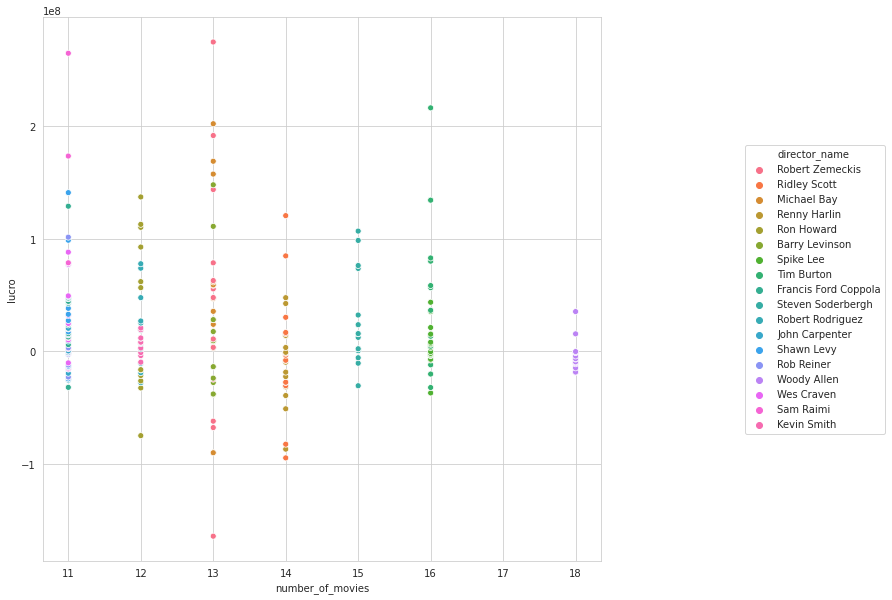

In [0]:
plt.figure(figsize=(10,10))
g = sns.scatterplot(data=diretores_com_mais_de_10_e_menos_de_20_filmes, y="lucro",x="number_of_movies", hue="director_name")
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
g

##Desafio 6: Interpretar melhor o gráfico e outros gráficos. Mudar marcadores

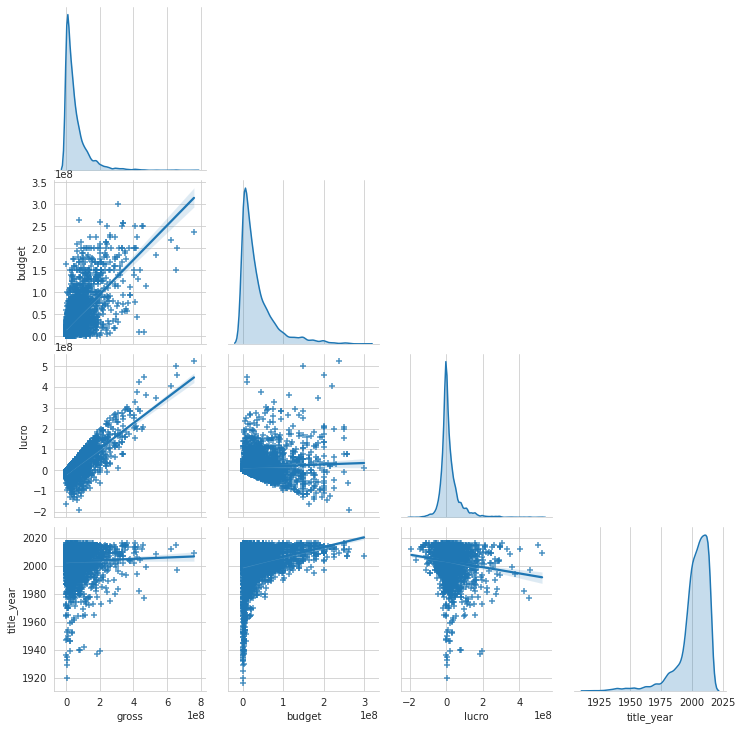

In [0]:
sns.pairplot(data= imdb_USA[["gross", "budget" ,  "lucro" , "title_year", "director_name"]], kind="reg", corner=True, diag_kind="kde", markers="+", dropna=True)
plt.show()

##Desafio 7: Verificar correlação em filmes depois de 2000 e interpretar os dados

In [0]:
imdb_USA_pos_2000= imdb_USA.query("title_year >=  2000")
imdb_USA_pos_2000[["gross", "budget" ,  "lucro" ,  "title_year", "imdb_score"]].corr()


,gross,budget,lucro,title_year,imdb_score
gross,1.000000,0.709233,0.770642,0.105342,0.249020
budget,0.709233,1.000000,0.097307,0.058550,0.175561
lucro,0.770642,0.097307,1.000000,0.035039,0.243532
title_year,0.105342,0.058550,0.035039,1.000000,-0.012229
imdb_score,0.249020,0.175561,0.243532,-0.012229,1.000000


Há uma maior correlação entre orçamentoXlucroXfaturamento, mas há quase nenhuma correlaçai entre o ano do filme e os demais features. A nota do imdb também não possui uma correlação muito forte com o lucro ou o faturamento ou o orçamento. 

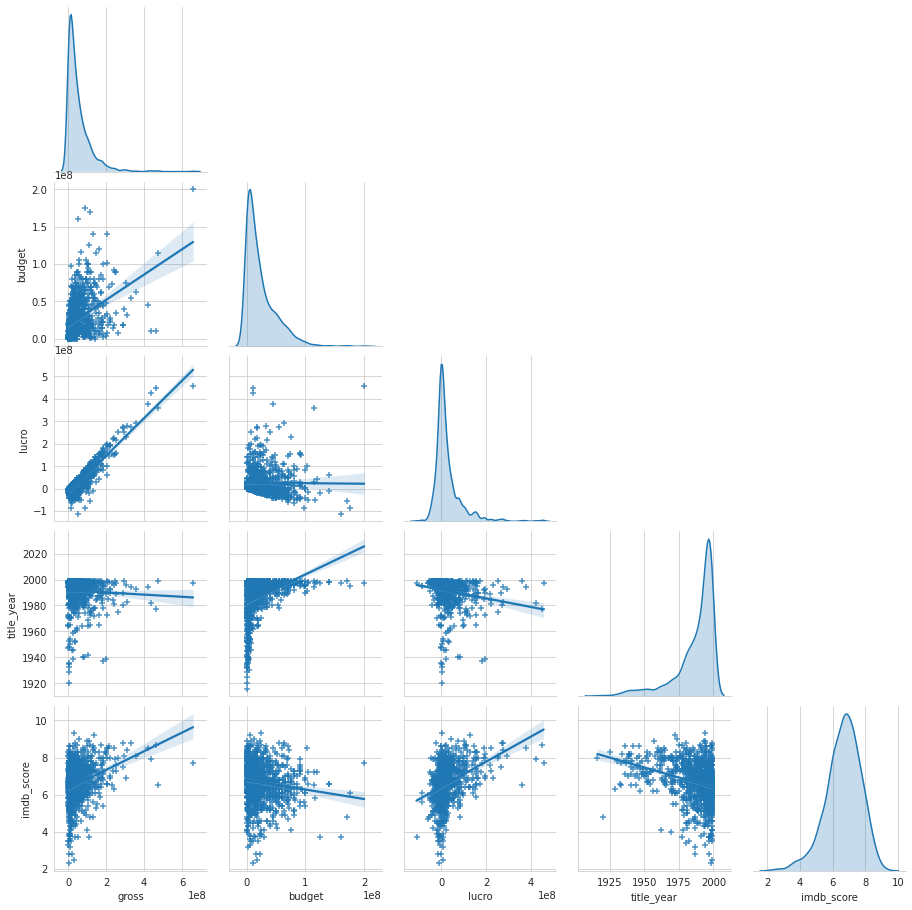

In [0]:
sns.pairplot(data=imdb_USA_pos_2000[["gross", "budget" ,  "lucro" ,  "title_year", "imdb_score"]], kind="reg", corner=True, diag_kind="kde", markers="+", dropna=True)
plt.show()

##Desafio 8: tentar encontrar uma reta, no gráfico que parece se aproximar com uma reta

In [0]:
imdb_USA_pre_2000= imdb_USA.query("title_year <  2000")
imdb_USA_pre_2000[["gross", "budget" ,  "lucro" ,  "title_year", "imdb_score"]].corr()

,gross,budget,lucro,title_year,imdb_score
gross,1.000000,0.405214,0.909671,-0.051732,0.306897
budget,0.405214,1.000000,-0.011092,0.398214,-0.126586
lucro,0.909671,-0.011092,1.000000,-0.190501,0.377877
title_year,-0.051732,0.398214,-0.190501,1.000000,-0.291995
imdb_score,0.306897,-0.126586,0.377877,-0.291995,1.000000


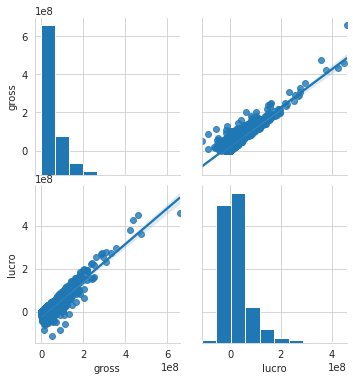

In [0]:
sns.pairplot(data=imdb_USA_pre_2000[["gross", "lucro" ]], kind="reg")

##Desafio 9: utilizar também as notas (imdb_score) nas correlações, nos gráficos. Número de avaliações por ano pode ser uma feature

In [0]:
#criando a soma dos votos por ano
imdb_USA_votos_por_ano = imdb_USA.groupby("title_year").sum()["num_voted_users"]
imdb_USA_votos_por_ano.head()

title_year
1916.0    10718
1920.0        5
1925.0     4849
1929.0     4546
1930.0     3753
Name: num_voted_users, dtype: int64

In [0]:
#juntando a uma das bases
base_desafio_9 = imdb_USA[["movie_title","director_name", "budget", "gross", "lucro", "title_year","imdb_score", "duration"]].set_index("title_year").join(imdb_USA_votos_por_ano, on="title_year")
base_desafio_9.head()
base_desafio_9.columns=["movie_title","director_name", "budget", "gross", "lucro", "imdb_score","duration","votes_total"]
base_desafio_9 = base_desafio_9.reset_index()
base_desafio_9.head()

,title_year,movie_title,director_name,budget,gross,lucro,imdb_score,duration,votes_total
0,2009.0,Avatar,James Cameron,237000000.0,760505847.0,523505847.0,7.9,178.0,16554036.0
1,2007.0,Pirates of the Caribbean: At World's End,Gore Verbinski,300000000.0,309404152.0,9404152.0,7.1,169.0,15884736.0
2,2012.0,The Dark Knight Rises,Christopher Nolan,250000000.0,448130642.0,198130642.0,8.5,164.0,19862275.0
3,2012.0,John Carter,Andrew Stanton,263700000.0,73058679.0,-190641321.0,6.6,132.0,19862275.0
4,2007.0,Spider-Man 3,Sam Raimi,258000000.0,336530303.0,78530303.0,6.2,156.0,15884736.0


In [0]:
base_desafio_9[["gross", "budget" ,  "lucro" ,  "title_year", "imdb_score", "duration","votes_total"]].corr()

,gross,budget,lucro,title_year,imdb_score,duration,votes_total
gross,1.000000,0.645673,0.797037,0.034827,0.258948,0.286503,0.004299
budget,0.645673,1.000000,0.053455,0.229453,0.078936,0.315569,0.194059
lucro,0.797037,0.053455,1.000000,-0.123035,0.294858,0.128253,-0.114601
title_year,0.034827,0.229453,-0.123035,1.000000,-0.227569,-0.124484,0.762953
imdb_score,0.258948,0.078936,0.294858,-0.227569,1.000000,0.275720,-0.165823
duration,0.286503,0.315569,0.128253,-0.124484,0.275720,1.000000,-0.128045
votes_total,0.004299,0.194059,-0.114601,0.762953,-0.165823,-0.128045,1.000000


<function matplotlib.pyplot.show>

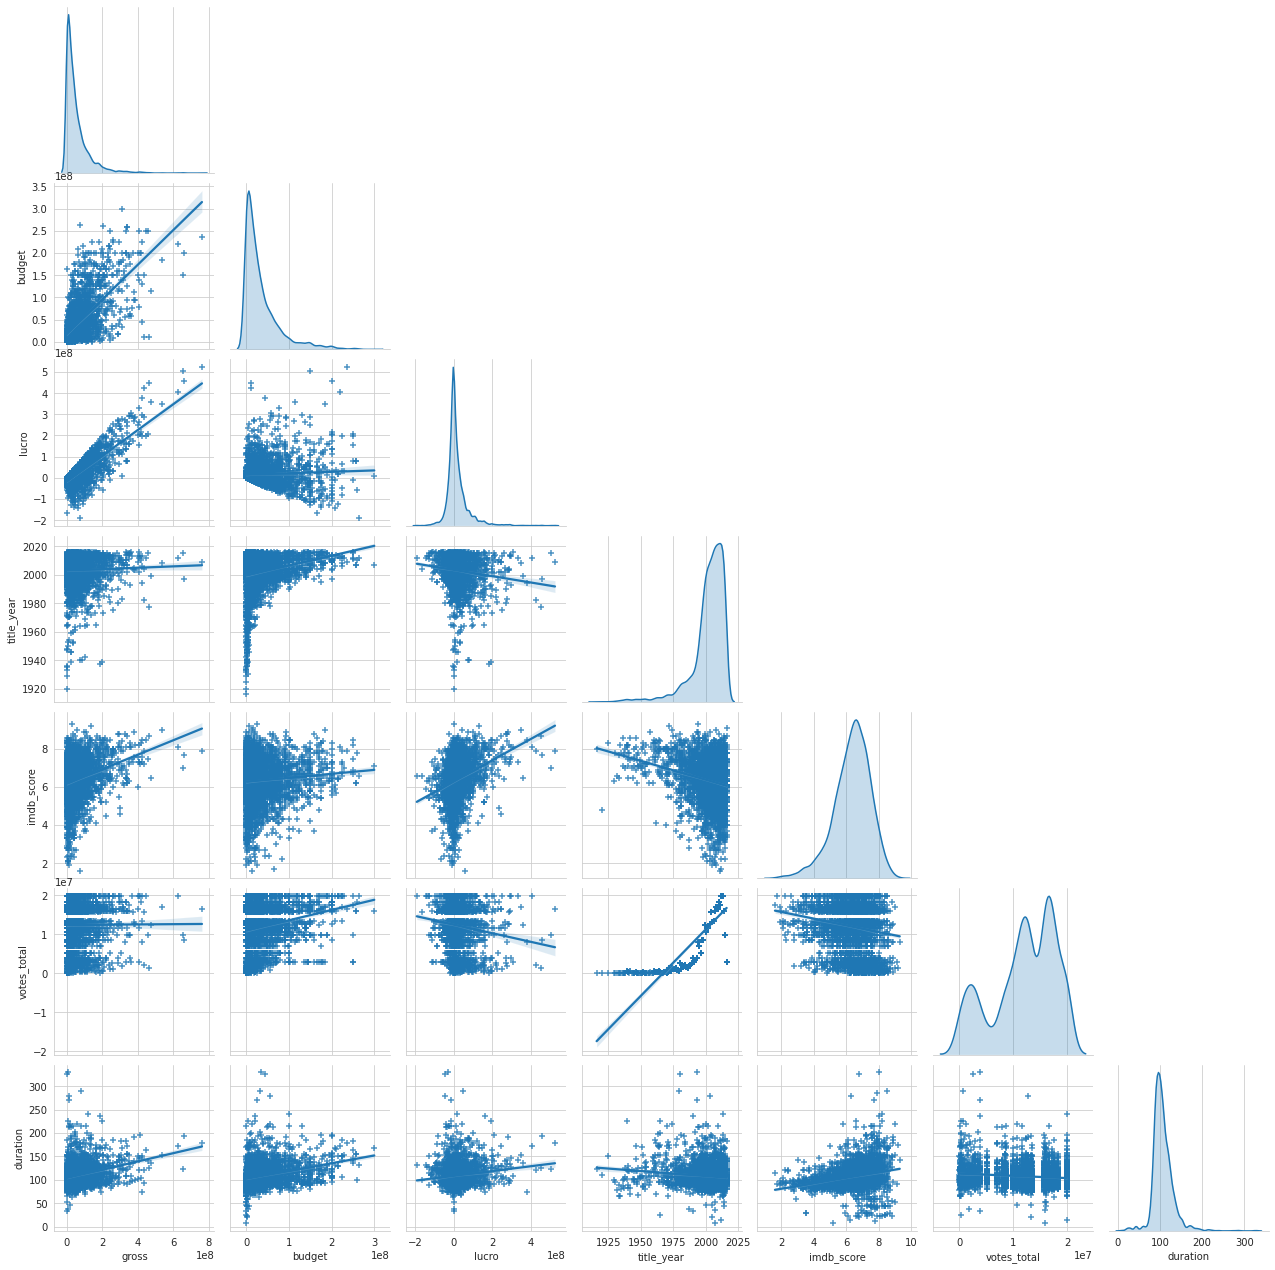

In [0]:
#plotando o pairplot da zorra toda
sns.pairplot(data=base_desafio_9[["gross", "budget" ,  "lucro" ,  "title_year", "imdb_score", "votes_total", "duration"]], kind="reg", corner=True, diag_kind="kde", markers="+", dropna=True)
plt.show

##teste filmes pré e pós 2000

In [0]:
len(imdb_USA_pre_2000)

1064

In [0]:
len(imdb_USA_pos_2000)

2636

In [0]:
imdb_pre_2000= imdb.query("title_year <  2000")
imdb_pre_2000[["gross", "budget" , "title_year", "imdb_score"]].corr()

,gross,budget,title_year,imdb_score
gross,1.000000,0.077605,-0.044484,0.246150
budget,0.077605,1.000000,0.147096,-0.001474
title_year,-0.044484,0.147096,1.000000,-0.286387
imdb_score,0.246150,-0.001474,-0.286387,1.000000


In [0]:
imdb_pos_2000= imdb.query("title_year >=  2000")
imdb_pos_2000[["gross", "budget" ,"title_year", "imdb_score"]].corr()

,gross,budget,title_year,imdb_score
gross,1.000000,0.108077,0.101682,0.188195
budget,0.108077,1.000000,-0.005631,0.044972
title_year,0.101682,-0.005631,1.000000,-0.034905
imdb_score,0.188195,0.044972,-0.034905,1.000000
